# FIRST TASK
* Prediction using Supervised ML

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Getting Data 


In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv" #retrieving data from the given URL
df=pd.read_csv(url)

## Data Analysis

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info() #general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe() #statistical information about the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Model Building 

In [6]:
X = df[["Hours"]]
y = df["Scores"]

In [7]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2, random_state=0) #splitting the dataset for training and testing

In [8]:
reg=LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [9]:
reg.score(xtest, ytest)*100 #score of the model built

94.54906892105355

In [10]:
ypred=reg.predict(xtest)    #Predicting values

## Visualization

In [11]:
import matplotlib.pyplot as plt

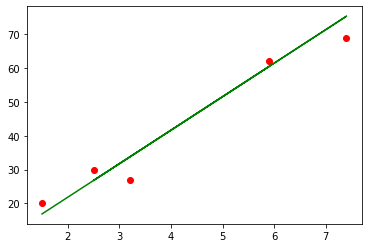

In [12]:
plt.plot(xtest, ytest, "or", label="OG")
plt.plot(xtest, ypred, "-g", label="Prd")
plt.legend=True
plt.show()

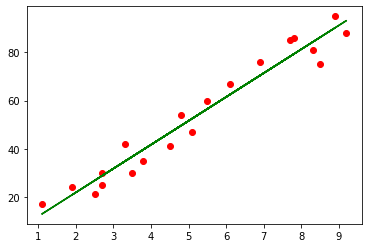

In [13]:
plt.plot(xtrain, ytrain, "or", label="OG")
plt.plot(xtrain, reg.predict(xtrain), "-g", label="Prd")
plt.legend=True
plt.show()

In [14]:
reg.predict([[4.5]]) #Prediction of a certain input

array([46.6161142])

## Grid Search for better optimized result 

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
reg=LinearRegression()
pm=[{"n_jobs":[2,3,4,5,6,7,8,9]}]

In [17]:
GridSearchCV.get_params(reg)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [18]:
gsearch=GridSearchCV(reg, pm, cv=3)

In [19]:
gsearch.fit(X,y)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid=[{'n_jobs': [2, 3, 4, 5, 6, 7, 8, 9]}])

In [20]:
gsearch.best_params_ #finding the best parameters for better results 

{'n_jobs': 2}

In [21]:
est=gsearch.best_estimator_
est.score(xtest, ytest)*100

94.91748734859172

As you can see the score is slightly better 

## Model Evalaution

In [22]:
from sklearn import metrics

In [23]:
er=metrics.mean_absolute_error(ytest, ypred)

In [24]:
er #error

4.183859899002975

## Making predictions 

In [25]:
# Predicting outcome on a random input
eg=5.8 #random value
res=est.predict([[eg]]) #prediction
res

array([59.18333307])